/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

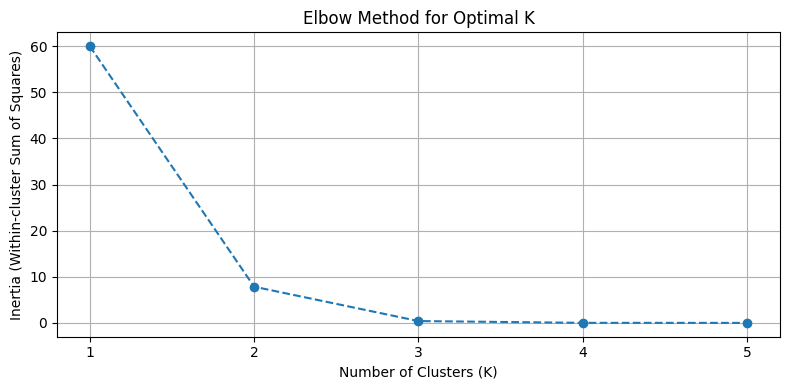

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a Pandas DataFrame
file_path = 'Clustering_analysis.csv'
data = pd.read_csv(file_path)

# Select the columns you want to use for clustering
selected_columns = data.columns[7:-1]

# Create a new DataFrame with the selected columns
selected_data = data[selected_columns]

# Normalize the data (important for K-Means)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_data)

# Determine the optimal number of clusters (K) using the Elbow method
inertia = []
k_values = range(1, 6)  # Reducing the range to avoid the error
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid()
plt.tight_layout()
plt.show()

# Based on the Elbow method, choose an appropriate K value (number of clusters)
# You can visually inspect the graph and select a value where the inertia starts to level off.

# Perform K-Means clustering with the chosen K value
k = 3  # You can adjust this value based on the Elbow method result
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Now, you have assigned clusters to each row in your dataset.
# You can further analyze and visualize the clustering results as needed.
# For example, you can create scatter plots or other visualizations to see how data points in different clusters are distributed.


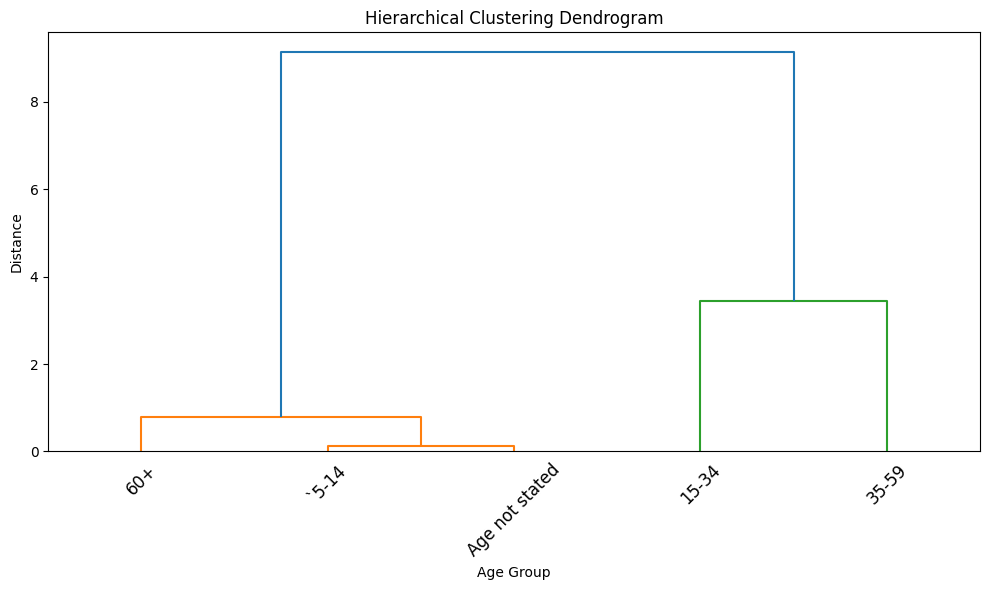

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# Load the CSV file into a Pandas DataFrame
file_path = 'Clustering_analysis.csv'
data = pd.read_csv(file_path)

# Select the columns you want to use for clustering
# In this case, you may want to use the columns representing industrial categories and age groups.
selected_columns = data.columns[7:-1]  # Adjust the column range as needed

# Create a new DataFrame with the selected columns
selected_data = data[selected_columns]

# Normalize the data (important for hierarchical clustering)
normalized_data = (selected_data - selected_data.mean()) / selected_data.std()

# Calculate the pairwise distances between data points
distances = pdist(normalized_data, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distances, method='ward')

# Create a cluster diagram (dendrogram)
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=data['Age group'].tolist(), orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Age Group')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Divisive Clusters:
        Age group  Divisive Cluster
0           `5-14                 1
1           15-34                 2
2           35-59                 3
3             60+                 1
4  Age not stated                 1


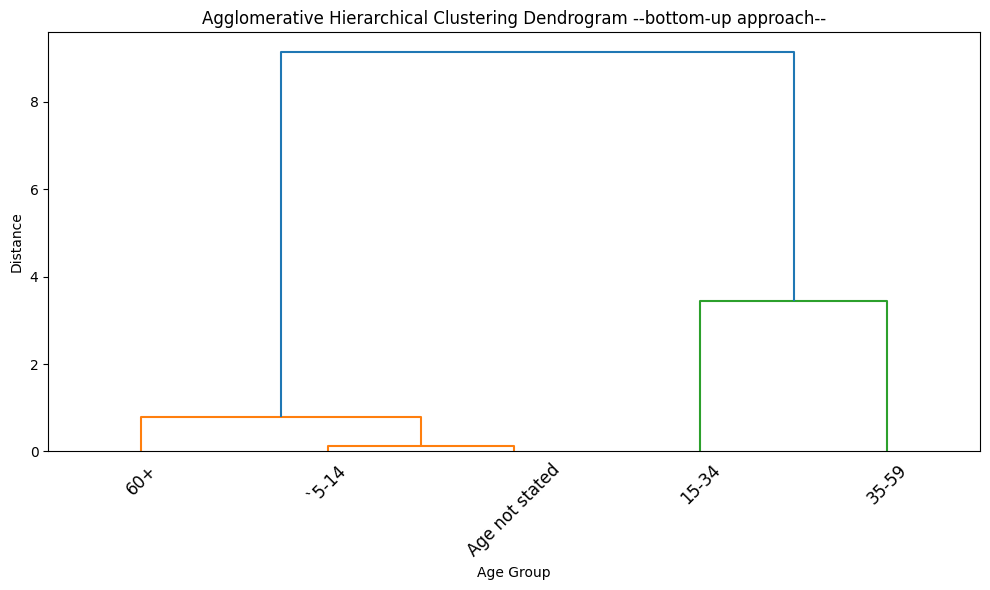

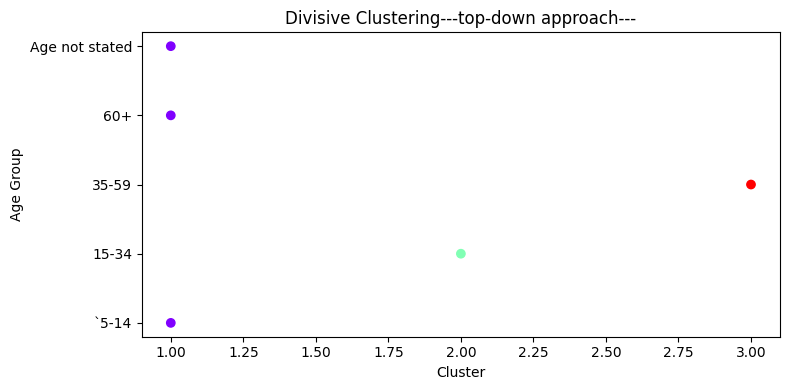

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# Load the CSV file into a Pandas DataFrame
file_path = 'Clustering_analysis.csv'
data = pd.read_csv(file_path)

# Select the columns you want to use for clustering
# In this case, you may want to use the columns representing industrial categories and age groups.
selected_columns = data.columns[7:-1]  # Adjust the column range as needed

# Create a new DataFrame with the selected columns
selected_data = data[selected_columns]

# Normalize the data (important for hierarchical clustering)
normalized_data = (selected_data - selected_data.mean()) / selected_data.std()

# Calculate the pairwise distances between data points
distances = pdist(normalized_data, metric='euclidean')

# Perform Agglomerative hierarchical clustering
agglomerative_linkage = hierarchy.linkage(distances, method='ward')

# Create an Agglomerative cluster diagram (dendrogram)
plt.figure(figsize=(10, 6))
dendrogram_agg = hierarchy.dendrogram(agglomerative_linkage, labels=data['Age group'].tolist(), orientation='top')
plt.title('Agglomerative Hierarchical Clustering Dendrogram --bottom-up approach--')
plt.xlabel('Age Group')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.tight_layout()

# Perform Divisive hierarchical clustering (top-down approach)
# You can use the fcluster function with t parameter to set the desired number of clusters.
from scipy.cluster.hierarchy import fcluster
k = 3  # Specify the number of clusters for Divisive clustering
divisive_clusters = fcluster(agglomerative_linkage, k, criterion='maxclust')

# Add the divisive cluster labels to the DataFrame
data['Divisive Cluster'] = divisive_clusters

# Now, you can analyze and visualize the divisive clusters as needed.

# Show the Divisive clustering results
print("Divisive Clusters:")
print(data[['Age group', 'Divisive Cluster']])

# Plot the Divisive clusters
plt.figure(figsize=(8, 4))
plt.scatter(data['Divisive Cluster'], data['Age group'], c=data['Divisive Cluster'], cmap='rainbow')
plt.title('Divisive Clustering---top-down approach---')
plt.xlabel('Cluster')
plt.ylabel('Age Group')
plt.tight_layout()

plt.show()
